/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/coins.png


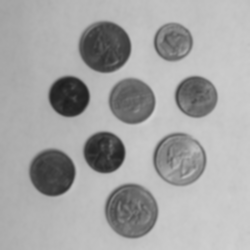

(250, 250)

In [5]:
# USAGE
# python blurring.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/coins.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

# Load the image, convert it to grayscale, and blur it slightly
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(blurred))

image.shape


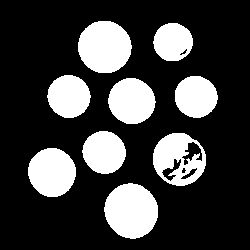

In [6]:
# Let's apply basic thresholding. The first parameter is the
# image we want to threshold, the second value is is our threshold
# check. If a pixel value is greater than our threshold (in this
# case, 155), we it to be WHITE, otherwise it is BLACK.
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(threshInv))

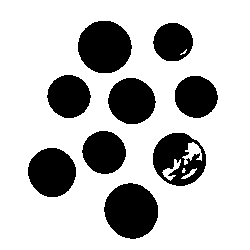

In [7]:
# Using a normal we can change the last argument in the function
# to make the coins black rather than white.
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
display(Image.fromarray(thresh))

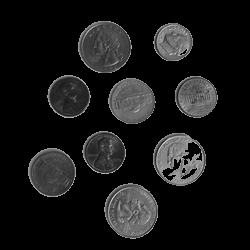

In [8]:
# Finally, let's use our threshold as a mask and visualize only
# the coins in the image
# cv2.imshow("Coins", cv2.bitwise_and(image, image, mask=threshInv))


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(cv2.bitwise_and(image, image, mask=threshInv)))